In [332]:
# import
from urllib.parse import urlparse
import requests
import urllib.parse
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns
import json
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import re
key_fd = open('./과제data/gov_data_api_key2.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()
start_date = '20200101'
end_date = datetime.today().strftime("%Y%m%d")
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key+"3D"}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
soup.find('resultCode').get_text()

'00'

In [473]:
soup.find('examCnt')

<examCnt>64017</examCnt>

In [477]:
totalCount = int(soup.find('totalCount').text)
totalCount

In [482]:
dec = {}
for i in range(totalCount):
    a = soup.find_all('stateDt')[i].text
    b = soup.find_all('decideCnt')[i].text
    if a in dec.keys():
        dec[a] = b
    else:
        dec.update({a: b})

In [483]:
dec

{'20201204': '36332',
 '20201203': '35703',
 '20201202': '35163',
 '20201201': '34652',
 '20201130': '34201',
 '20201129': '33824',
 '20201128': '33375',
 '20201127': '32887',
 '20201126': '32318',
 '20201125': '31735',
 '20201124': '31353',
 '20201123': '31004',
 '20201122': '30733',
 '20201121': '30403',
 '20201120': '30017',
 '20201119': '29654',
 '20201118': '29311',
 '20201117': '28998',
 '20201116': '28769',
 '20201115': '28546',
 '20201114': '28338',
 '20201113': '28133',
 '20201112': '27942',
 '20201111': '27799',
 '20201110': '27653',
 '20201109': '27553',
 '20201108': '27427',
 '20201107': '27284',
 '20201106': '27195',
 '20201105': '27050',
 '20201104': '26925',
 '20201103': '26807',
 '20201102': '26732',
 '20201101': '26635',
 '20201031': '26511',
 '20201030': '26385',
 '20201029': '26271',
 '20201028': '26146',
 '20201027': '26043',
 '20201026': '25955',
 '20201025': '25836',
 '20201024': '25775',
 '20201023': '25698',
 '20201022': '25543',
 '20201021': '25424',
 '20201020

In [123]:
df = pd.read_csv('./results/def_df.csv')

In [124]:
df.rename({'Unnamed: 0': '구분'},axis=1,inplace=True )

In [125]:
df.set_index('구분',inplace=True)

,2020년 12월 03일 00시,2020년 12월 02일 00시,2020년 12월 01일 00시,2020년 11월 30일 00시,2020년 11월 29일 00시,2020년 11월 28일 00시,2020년 11월 27일 00시,2020년 11월 26일 00시,2020년 11월 25일 00시,2020년 11월 24일 00시,...,2020년 3월 12일 00시,2020년 3월 11일 00시,2020년 3월 10일 00시,2020년 3월 9일 00시,2020년 3월 8일 00시,2020년 3월 7일 00시,2020년 3월 6일 00시,2020년 3월 5일 00시,2020년 3월 4일 00시,2020년 3월 1일 16시
구분,,,,,,,,,,,,,,,,,,,,,
검역,2163,2150,2144,2130,2181,2164,2175,2144,2132,2125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
제주,84,83,81,80,79,78,76,73,70,67,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0
경남,656,643,636,625,605,590,576,537,492,481,...,85.0,84.0,83.0,83.0,83.0,82.0,77.0,74.0,65.0,0
경북,1731,1720,1715,1704,1700,1689,1684,1681,1679,1676,...,1143.0,1135.0,1117.0,1107.0,1081.0,1049.0,984.0,861.0,774.0,0
전남,429,427,426,424,419,400,393,382,373,365,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,0
전북,378,369,343,334,318,301,292,268,252,244,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0
충남,937,923,915,899,894,881,864,833,817,799,...,114.0,112.0,104.0,102.0,98.0,92.0,90.0,86.0,82.0,0
충북,385,375,359,327,306,283,259,239,231,228,...,27.0,27.0,25.0,25.0,24.0,20.0,15.0,12.0,11.0,0
강원,681,673,661,652,644,625,592,583,575,562,...,29.0,29.0,28.0,28.0,27.0,26.0,25.0,23.0,21.0,0


In [284]:
da = df.T

In [285]:
da.head()

구분,검역,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,합계
2020년 12월 03일 00시,2163.0,84.0,656.0,1731.0,429.0,378.0,937.0,385.0,681.0,7658.0,113.0,213.0,516.0,731.0,1470.0,7250.0,887.0,9421.0,35703.0
2020년 12월 02일 00시,2150.0,83.0,643.0,1720.0,427.0,369.0,923.0,375.0,673.0,7517.0,109.0,211.0,509.0,728.0,1448.0,7247.0,872.0,9159.0,35163.0
2020년 12월 01일 00시,2144.0,81.0,636.0,1715.0,426.0,343.0,915.0,359.0,661.0,7373.0,102.0,201.0,504.0,718.0,1425.0,7243.0,840.0,8966.0,34652.0
2020년 11월 30일 00시,2130.0,80.0,625.0,1704.0,424.0,334.0,899.0,327.0,652.0,7277.0,100.0,198.0,494.0,696.0,1409.0,7232.0,809.0,8811.0,34201.0
2020년 11월 29일 00시,2181.0,79.0,605.0,1700.0,419.0,318.0,894.0,306.0,644.0,7207.0,99.0,195.0,489.0,683.0,1376.0,7228.0,757.0,8644.0,33824.0


In [325]:
da.fillna(0,inplace=True)

In [444]:
cs =pd.DataFrame()
cc =da[1:]
cc.reset_index(inplace=True)

In [445]:
da.reset_index(inplace=True)

In [446]:
cs[['서울','경기','대구']] = da[['서울','경기','대구']] - cc[['서울','경기','대구']]

In [447]:
cs

,서울,경기,대구
0,262.0,141.0,3.0
1,193.0,144.0,4.0
2,155.0,96.0,11.0
3,167.0,70.0,4.0
4,150.0,100.0,3.0
...,...,...,...
289,3.0,10.0,390.0
290,2.0,10.0,367.0
291,4.0,9.0,321.0
292,99.0,101.0,4006.0


In [450]:
da = df.T
da.head()

구분,검역,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,합계
2020년 12월 03일 00시,2163.0,84.0,656.0,1731.0,429.0,378.0,937.0,385.0,681.0,7658.0,113.0,213.0,516.0,731.0,1470.0,7250.0,887.0,9421.0,35703.0
2020년 12월 02일 00시,2150.0,83.0,643.0,1720.0,427.0,369.0,923.0,375.0,673.0,7517.0,109.0,211.0,509.0,728.0,1448.0,7247.0,872.0,9159.0,35163.0
2020년 12월 01일 00시,2144.0,81.0,636.0,1715.0,426.0,343.0,915.0,359.0,661.0,7373.0,102.0,201.0,504.0,718.0,1425.0,7243.0,840.0,8966.0,34652.0
2020년 11월 30일 00시,2130.0,80.0,625.0,1704.0,424.0,334.0,899.0,327.0,652.0,7277.0,100.0,198.0,494.0,696.0,1409.0,7232.0,809.0,8811.0,34201.0
2020년 11월 29일 00시,2181.0,79.0,605.0,1700.0,419.0,318.0,894.0,306.0,644.0,7207.0,99.0,195.0,489.0,683.0,1376.0,7228.0,757.0,8644.0,33824.0


In [451]:
da.index = da.index.str.replace('년','-')
da.index = da.index.str.replace('월','-')
da.index = da.index.str.replace('일','-')
da.index = da.index.str.replace('시','')
da.index = da.index.str.replace(' ','')

In [452]:
da.index = pd.to_datetime(da.index)

In [453]:
del da['검역']
del da['합계']

In [454]:
# 카카오 키 불러오기
key_fd = open('kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [455]:
c_l = da.columns
cc_l = []
for i in range(len(c_l)):
    if i > 8:
        cc_l.append(c_l[i] +  '시청')
    else :
        cc_l.append(c_l[i] +  '도청')

In [456]:
addr = []
for i in cc_l:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + i
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    addr.append(result['documents'][0]['address_name'])

In [457]:
addr

['제주특별자치도 제주시 연동 312-1',
 '경남 창원시 의창구 사림동 1',
 '경북 안동시 풍천면 갈전리 1155',
 '전남 무안군 삼향읍 남악리 1000',
 '전북 전주시 완산구 효자동3가 1',
 '충남 홍성군 홍북읍 신경리 538',
 '충북 청주시 상당구 문화동 89',
 '강원 춘천시 봉의동 15',
 '경기 수원시 팔달구 매산로3가 1-1',
 '세종특별자치시 보람동 626-5',
 '울산 남구 신정동 646-4',
 '대전 서구 둔산동 1420',
 '경기 광주시 송정동 570',
 '인천 남동구 구월동 1138',
 '대구 중구 동인동1가 2-1',
 '부산 연제구 연산동 1000',
 '서울 중구 태평로1가 31']

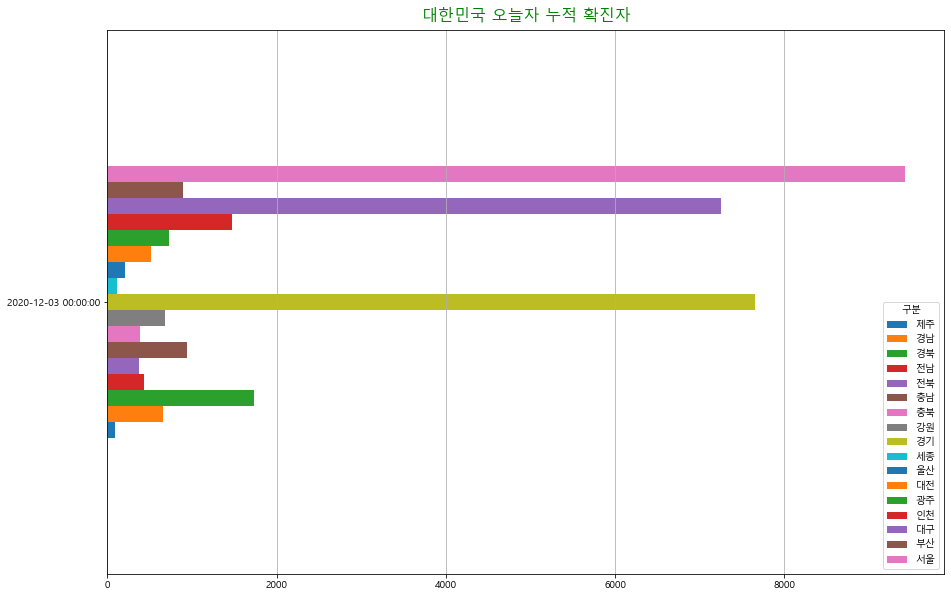

In [470]:
da[:1].plot.barh(figsize=(15,10))
plt.grid(True, axis='x')
plt.title('대한민국 지역별 오늘자 누적 확진자', loc='center', pad=10, fontsize=16, color='g')
plt.show()

In [423]:
da

구분,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울
2020-12-03-00,84.0,656.0,1731.0,429.0,378.0,937.0,385.0,681.0,7658.0,113.0,213.0,516.0,731.0,1470.0,7250.0,887.0,9421.0
2020-12-02-00,83.0,643.0,1720.0,427.0,369.0,923.0,375.0,673.0,7517.0,109.0,211.0,509.0,728.0,1448.0,7247.0,872.0,9159.0
2020-12-01-00,81.0,636.0,1715.0,426.0,343.0,915.0,359.0,661.0,7373.0,102.0,201.0,504.0,718.0,1425.0,7243.0,840.0,8966.0
2020-11-30-00,80.0,625.0,1704.0,424.0,334.0,899.0,327.0,652.0,7277.0,100.0,198.0,494.0,696.0,1409.0,7232.0,809.0,8811.0
2020-11-29-00,79.0,605.0,1700.0,419.0,318.0,894.0,306.0,644.0,7207.0,99.0,195.0,489.0,683.0,1376.0,7228.0,757.0,8644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-3-7-00,4.0,82.0,1049.0,4.0,7.0,92.0,20.0,26.0,130.0,2.0,23.0,18.0,13.0,9.0,5084.0,96.0,108.0
2020-3-6-00,4.0,77.0,984.0,4.0,7.0,90.0,15.0,25.0,120.0,1.0,23.0,18.0,13.0,9.0,4694.0,95.0,105.0
2020-3-5-00,4.0,74.0,861.0,4.0,7.0,86.0,12.0,23.0,110.0,1.0,23.0,16.0,14.0,9.0,4327.0,92.0,103.0
2020-3-4-00,3.0,65.0,774.0,5.0,7.0,82.0,11.0,21.0,101.0,1.0,23.0,15.0,13.0,9.0,4006.0,93.0,99.0
